# IRIS FLOWER CLASSIFICATION

#### CodSoft DataScience Internship by Tels Mariya Thomas 

https://www.kaggle.com/datasets/arshid/iris-flower-dataset

IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks. DOWNLOAD DATASET FROM HERE

In [6]:
#import the necessory libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
import seaborn as sns

# Load the data

In [4]:
# load the data 
data=pd.read_csv(r"IRIS.csv")

In [4]:
# display the first 5 rows 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# get info about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# the data set given has 150 entries and 4 columns. 

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

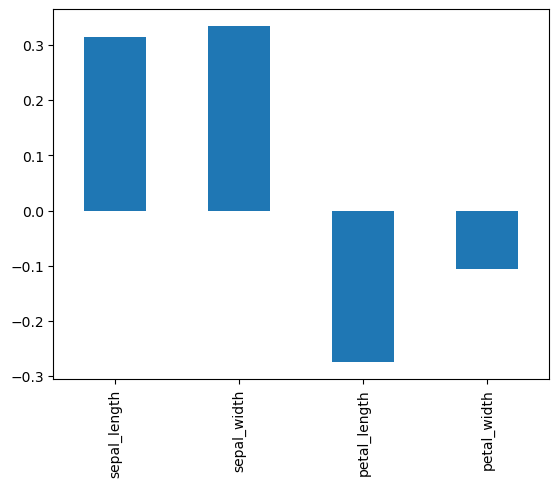

In [7]:
# checking for skeweness in the data 
data.skew().plot(kind='bar')

In [ ]:
# no mentionable skeweness in the data

# checking for missing values 

In [7]:
# check for null values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#There are no null values in the given data

In [9]:
# check class balance 
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
# The target column is balanecd. 

# Checking outliers 

<Axes: >

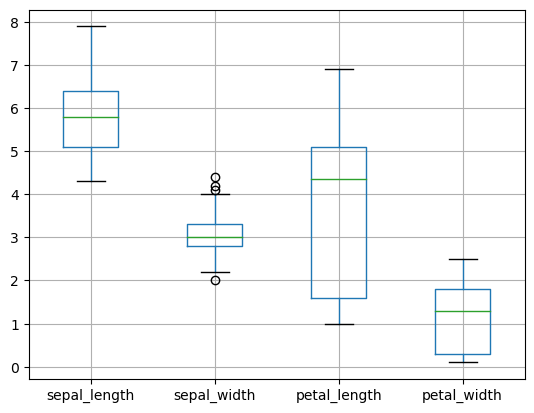

In [10]:
# check  for outliers 
data.boxplot()

In [ ]:
# there are no such extreme outliers in the data to be treated. 
# less data and less number of outliers

# EDA

In [58]:
# save the copy of the original data
df=data.copy()

In [59]:
# get the unique values in the spacies column
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
# label encode the target variable
df['species_label']=df['species'].apply(lambda x: 0 if x=='Iris-setosa' else 1 if x=='Iris-versicolor' else 2 )

In [61]:
df['species_label'].unique()

array([0, 1, 2], dtype=int64)

In [62]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


# Visualization 

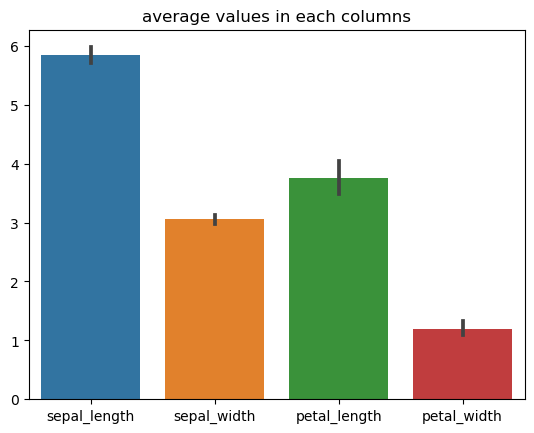

In [15]:
# average values in each columns 
sns.barplot(df.drop('species_label',axis=1))
plt.title('average values in each columns')
plt.show()

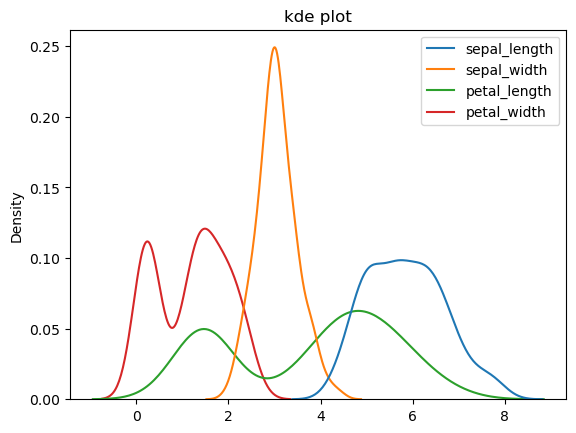

In [34]:
sns.kdeplot(df.drop('species_label',axis=1))
plt.title('kde plot')
plt.show()

<Figure size 2000x1000 with 0 Axes>

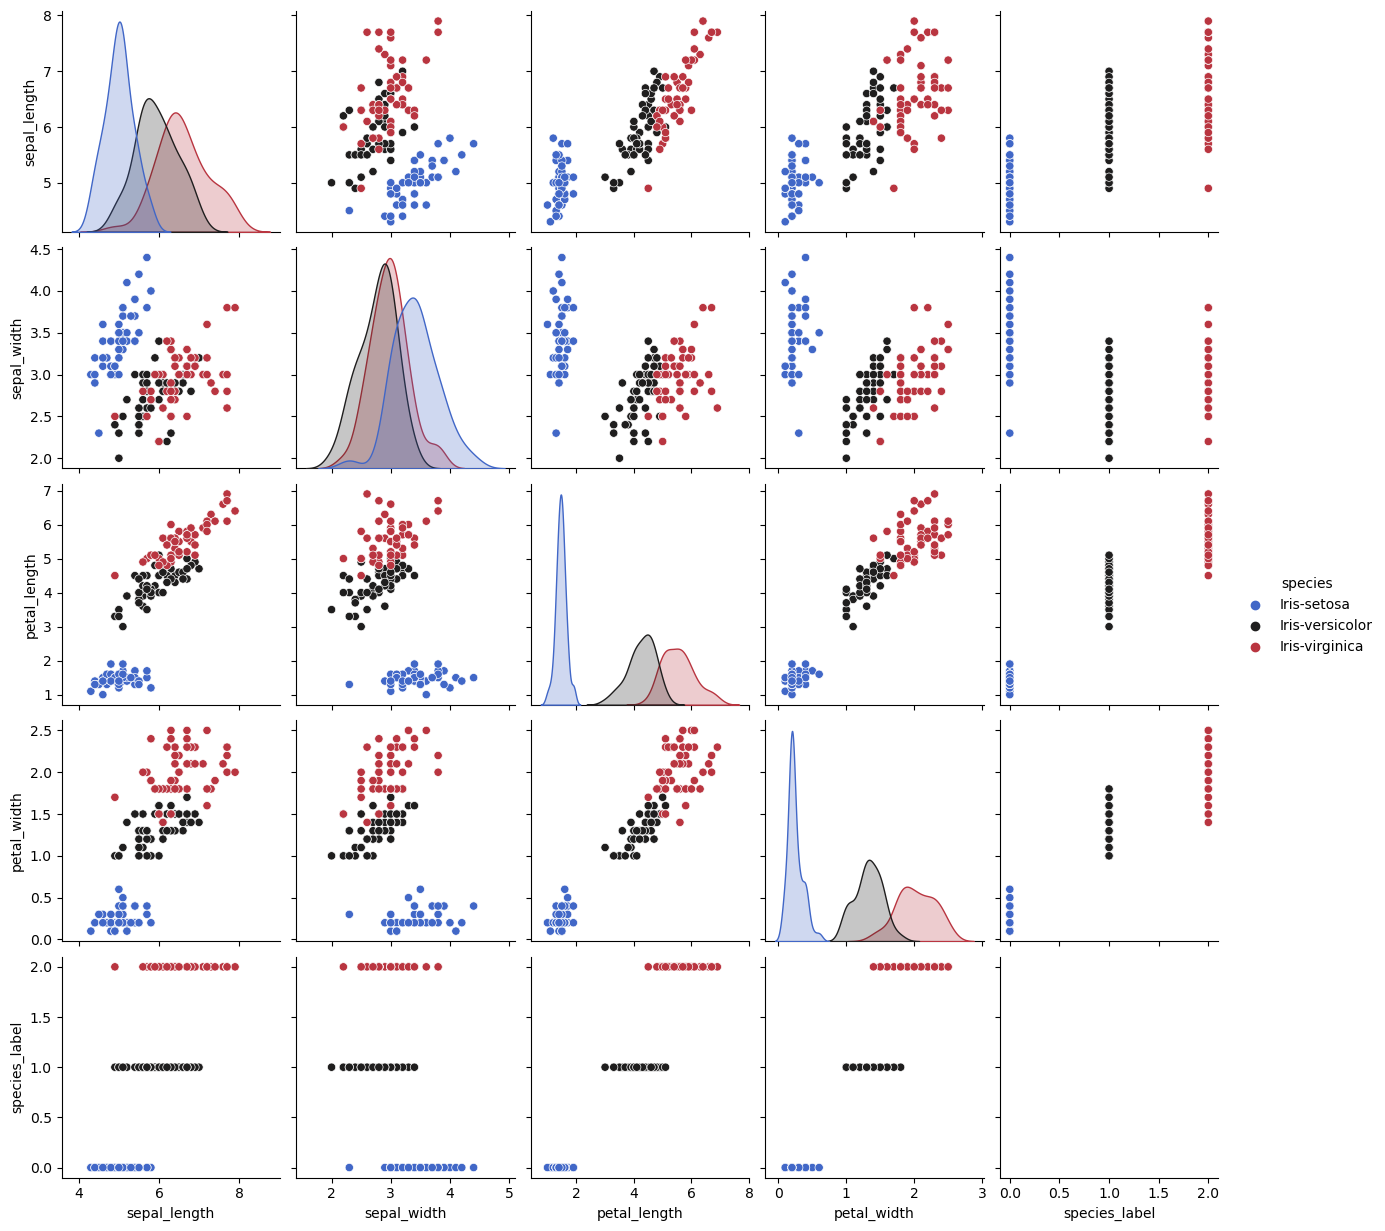

In [28]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df, hue='species',palette='icefire')
plt.show()

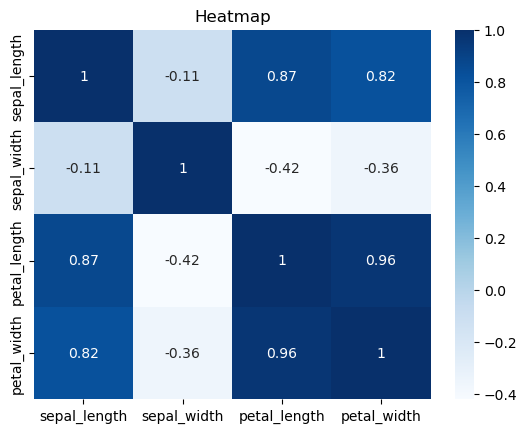

In [36]:
sns.heatmap(data.corr(), annot=True,cmap='Blues')
plt.title('Heatmap')
plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()

In [46]:
scaled_df=pd.DataFrame(sc.fit_transform(df.drop('species', axis=1)), columns=df.drop('species', axis=1).columns)

In [47]:
scaled_df

,sepal_length,sepal_width,petal_length,petal_width,species_label
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1.224745
146,0.553333,-1.281972,0.705893,0.922064,1.224745
147,0.795669,-0.124958,0.819624,1.053537,1.224745
148,0.432165,0.800654,0.933356,1.447956,1.224745


In [51]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [52]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [63]:
df1=df.copy()

In [64]:
df1['kmeans_label']=kmeans.labels_

In [65]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species,species_label,kmeans_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


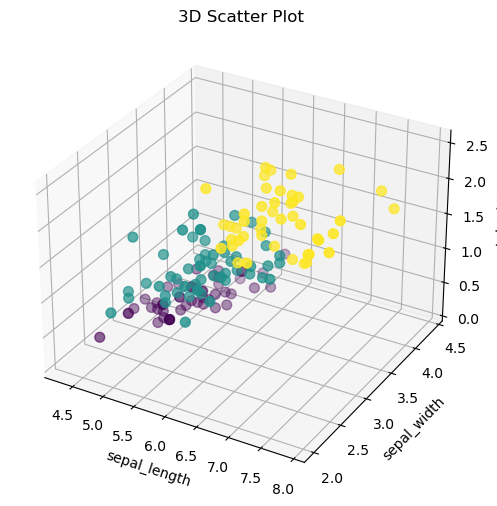

In [57]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_width'], c=df['kmeans_label'], cmap='viridis', s=50)

# Set labels for each axis
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_width')

plt.title('3D Scatter Plot')
plt.show()


### conclusions from the plots

the sepal_length average of the given data is around 5.5 and with high density between 4.5 and 6.5

the sepal_width average of the given data is around 3 and it has a high density around 3

the petal_length average of the given data is around 3.8 with high density at two places around 1.5 and 4.5. This 

multimodal density could possibly because the average petal length of 2 species are closer to each other and the other flower category has a different range in its petal length. 

the petal_width average of the given data is around 1.5. From the kde plot the density is multimodal with peaks at 0 and 2 which shows potentiall classes of flowers in the data or Guassian data. 

from the pairplot we can derive certian points, 
	*. the sepal_width and sepal_lenth shows a linear relationship. 
	* Btween petal_length and sepal_lenth tere is a linear realationship in most of the 	points while in the remaining dosent show a linear relationship. 
	* Between sepal_lenth and sepal_width one group of points shows a linear 	relationship while the other group stays stable in sepal length as the sepal width 	increases.  
	* petal_length and sepal_length are linearly changing. 
	*.petal_width and sepal_width has two clusters in the pairplot
	* petal_width and sepal_width are linearly connected. 
	* The sepal length of iris setosa could be greater than other 2 species
	* The sepal lenth of irirs-versicolor and iris-virginica are approxiamately same 
    * The sepal length and sepal width of the iris-setosa clusters separetly from the other two flowers which are in the same cluster. 
	* The sepal width of the iris setosa is small compared to the other two flower 			categories.
	* The sepal lenth vs sepal lebgth of iris setosa forms a separete cluster
	*  From the pairplot irirs-setosa seems little different from other two flowers. 

From the heat map there is a high correlation between sepal length and sepal width, sepal lenth and petal length, petal width and petal length. 

# Modelling

In [180]:
# import the libraries 
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix,accuracy_score,classification_report,\
recall_score,precision_score,f1_score, roc_curve


from sklearn.metrics import roc_auc_score


from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble  import AdaBoostClassifier


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

In [181]:
# seperate the variables 
features=df.drop(['species','species_label'], axis=1)
target=df['species_label']

In [182]:
# split the data into train and test 
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=1)

In [183]:
# scale the data 
from sklearn.preprocessing import StandardScaler

In [184]:
sc=StandardScaler()
xtrain=pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
xtest=pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

In [298]:
# fit all the classification models together 

classifiers ={'knn':KNeighborsClassifier(),
              'naive bayes':GaussianNB(),
              'decisiontree':DecisionTreeClassifier(),
              'randomforest':RandomForestClassifier(),
              'gradientboost':GradientBoostingClassifier(),
              'svm':SVC(),
             "xgboost":XGBClassifier()}
    
    
    
model_report=pd.DataFrame(columns=['model_name','accuracy','recall','precision','f1']) #,#'roc'

for classifier, classifier_name in list(zip(classifiers.values(), classifiers.keys())):
    classifier.fit(xtrain,y_train)
    y_pred=classifier.predict(xtest)
    print('fitting the model ....',classifier_name)
    t=pd.Series({
        'model_name':classifier_name, 
        'accuracy':accuracy_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred,average='micro'),
        'precision':precision_score(y_test,y_pred,average='micro'),
        'f1':f1_score(y_test,y_pred,average='micro'),
        #'roc':roc_auc_score(y_test,y_pred,average='micro',multi_class='ovo')
    })
    model_report=model_report.append(t,ignore_index=True)
    
model_report=model_report.sort_values(by='f1', ascending=False)

fitting the model .... knn
fitting the model .... naive bayes
fitting the model .... decisiontree
fitting the model .... randomforest
fitting the model .... gradientboost
fitting the model .... svm
fitting the model .... xgboost


In [299]:
# get the model report 
model_report

,model_name,accuracy,recall,precision,f1
0,knn,0.966667,0.966667,0.966667,0.966667
1,naive bayes,0.966667,0.966667,0.966667,0.966667
2,decisiontree,0.966667,0.966667,0.966667,0.966667
3,randomforest,0.966667,0.966667,0.966667,0.966667
4,gradientboost,0.966667,0.966667,0.966667,0.966667
5,svm,0.966667,0.966667,0.966667,0.966667
6,xgboost,0.933333,0.933333,0.933333,0.933333


In [ ]:
# from the model report logistic regression base model performs well.

# Opted model-KNN

In [319]:
KNN=KNeighborsClassifier()

In [320]:
KNN.fit(xtrain,y_train)
y_pred=lr.predict(xtest)

In [321]:
# get the predictions
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2], dtype=int64)

In [304]:
# get the accuracy score 
accuracy_score(y_test,y_pred)

0.9666666666666667

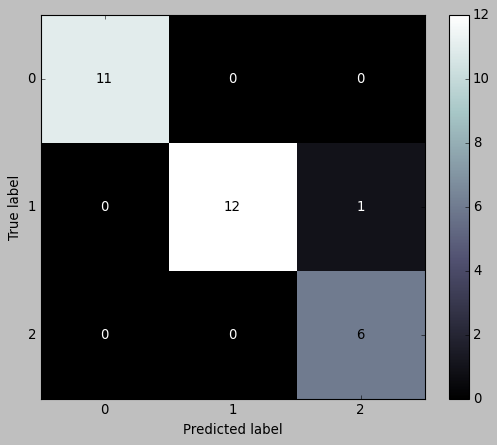

In [322]:
# display confusion matrix
plt.style.use('classic')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='bone')
plt.show()

In [306]:
# print the classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [307]:
# the model prediction is pretty good as it has only one wrong prediction. 

# Deploying the model 

In [308]:
import pickle
import streamlit

In [323]:
model=open('rfc.pickle','wb')
pickle.dump(KNN,model)  
model.close()

In [324]:
model=open('rfc.pickle','rb')
clf=pickle.load(model)   
model.close()

In [16]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
st.set_option('deprecation.showPyplotGlobalUse', False)



st.title('_IRIS FLOWER CLASSIFICATION_')
st.markdown("::white_flower::white_flower::white_flower::white_flower::white_flower:")

st.header('',divider='rainbow')
st.write('Do you want to know which category the iris flower belongs to? ')

st.markdown(''':black[IRIS Flower Classes in the dataset are:] :blue[_IRIS-SETOSA_,] :black[IRIS-VERSICOLOR,]
    :red[IRIS-VIRGINICA].''')

df=pd.read_csv(r"IRIS.csv")
if st.sidebar.checkbox('View Data', False):
    st.write(df)
if st.sidebar.checkbox('View Distributions', False):
    st.scatter_chart(data=df)
    plt.tight_layout()
    st.pyplot()
    


image = Image.open(r'C:iris-flower-meaning-and-symbolism.jpg')
st.image(image)

# step 1 : load the pickled model
model=open('rfc.pickle','rb')
clf=pickle.load(model)
model.close()
    
# step 2. get the front end user input 

sepal_length_=st.slider('sepal_length',4.2,8.0,4.2)
sepal_width_=st.slider('sepal_width',2.0,4.5,2.0)
petal_length_=st.slider('petal_length',1.0,7.0,1.0)
petal_width_=st.slider('petal_width',0.1,2.6,0.1)





sepal_length=(sepal_length_-df['sepal_length'].mean())/df['sepal_length'].std()
sepal_width=(sepal_width_-df['sepal_width'].mean())/df['sepal_width'].std()
petal_length=(petal_length_-df['petal_length'].mean())/df['petal_length'].std()
petal_width=(petal_width_-df['petal_width'].mean())/df['petal_width'].std()




#step 3: get the model input (convert user input to model impout)
input_data=[[sepal_length,sepal_width,petal_length,petal_width]]

#step 4: get the prediction and print the results 

prediction=clf.predict(input_data)[0]
if st.button('Predict'):
    if prediction==0:
        st.subheader('IRIS-SETOSA')
    elif prediction==1:
        st.subheader('IRIS-VERSICOLOR')
    elif prediction==2:
        st.subheader('IRIS-VIRGINICA')    


Overwriting app.py


##### thank you 